## Import the dependencies

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
img_height, img_width = 128, 128  
batch_size = 32
num_classes = 4 

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=15, 
    zoom_range=0.2, 
    horizontal_flip=True
)

In [5]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255
)


In [6]:
train_dir = 'Training'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [7]:
val_dir = 'Testing'

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 394 images belonging to 4 classes.


## CNN Model

In [8]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10


89/89 [==============================] - 114s 1s/step - loss: 1.1870 - accuracy: 0.4658 - val_loss: 1.6886 - val_accuracy: 0.2604
Epoch 2/10
89/89 [==============================] - 118s 1s/step - loss: 0.9170 - accuracy: 0.6082 - val_loss: 2.5313 - val_accuracy: 0.3359
Epoch 3/10
89/89 [==============================] - 91s 1s/step - loss: 0.7593 - accuracy: 0.6688 - val_loss: 2.2381 - val_accuracy: 0.3880
Epoch 4/10
89/89 [==============================] - 71s 786ms/step - loss: 0.6929 - accuracy: 0.7058 - val_loss: 3.2355 - val_accuracy: 0.3542
Epoch 5/10
89/89 [==============================] - 71s 796ms/step - loss: 0.6270 - accuracy: 0.7417 - val_loss: 2.7286 - val_accuracy: 0.4062
Epoch 6/10
89/89 [==============================] - 70s 789ms/step - loss: 0.5742 - accuracy: 0.7611 - val_loss: 2.3168 - val_accuracy: 0.4740
Epoch 7/10
89/89 [==============================] - 78s 879ms/step - loss: 0.5301 - accuracy: 0.7780 - val_loss: 3.0786 - val_accuracy: 0.4531
Epoc

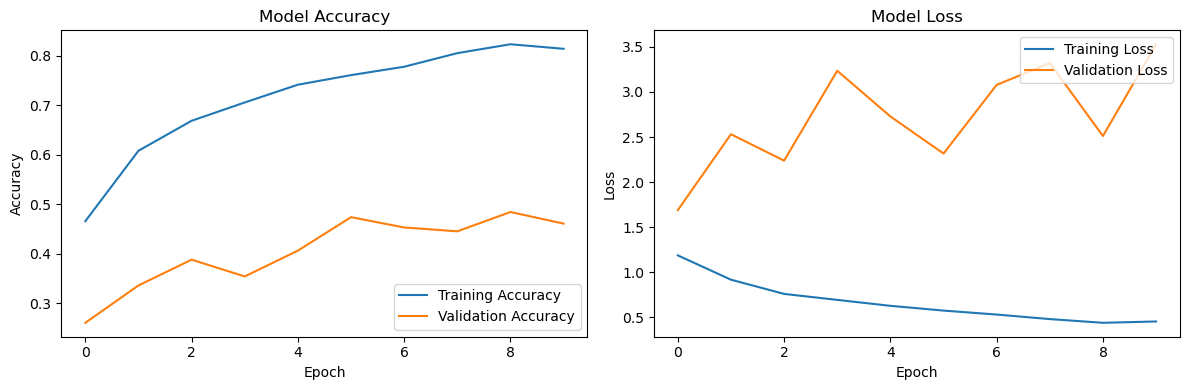

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [21]:
class_labels = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the image you want to predict
image_path = 'Testing/glioma_tumor/image(13).jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  

# Output the predicted class name and confidence
class_name = class_labels[predicted_class]
confidence = predictions[0][predicted_class]

print("Predicted class:", class_name)
print("Confidence:", confidence)


1/1 [==============================] - 0s 51ms/step
Predicted class: no_tumor
Confidence: 0.7324775


### save the model

In [26]:
model.save('tumor_classification.h5')


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
